# Регуляризация линейной регрессии. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии с регуляризацией на реальных данных.

## Что входит в практическую работу

1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ, сконструировать новые признаки.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью библиотеки Scikit-learn.
5. Подобрать коэффициенты регуляризации.
6. Получить качество модели с помощью MSE, MAE, $R^2$.
7. Ответить на вопросы в конце блокнота.

## Что оценивается 

- Выполнены все этапы работы.
- Подобраны коэффициенты регуляризации.
- Сделан вывод по результатам.
- Модель не переобучена.
- Получена модель хорошего качества.
- Сделаны выводы в конце блокнота.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задания.

## Задача

С набором данных вы уже знакомы из прошлого модуля — это данные по продажам домов. В этот раз признаков будет чуть больше, чтобы вам было интереснее. Краткое описание признаков:

* **LotArea** — размер участка в квадратных футах.
* **LotArea_M** — размер участка в квадратных метрах.
* **Street** — тип доступа к дороге.
* **BldgType** — тип жилья.
* **OverallQual** — общее качество материала и отделки.
* **OverallCond** — общая оценка состояния.
* **YearBuilt** — первоначальная дата постройки.
* **YearRemodAdd** — дата реконструкции.
* **RoofStyle** — тип крыши.
* **ExterQual** — качество материалов снаружи.
* **ExterCond** — текущее состояние материалов снаружи.
* **Foundation** — тип фундамента.
* **TotalBsmtSF** — общая площадь подвала в квадратных футах.
* **TotalBsmtSF_M** — общая площадь подвала в квадратных метрах.
* **Heating** — тип отопления.
* **HeatingQC** — качество и состояние отопления.
* **CentralAir** — кондиционирование.
* **GrLivArea** — жилая площадь в квадратных футах.
* **GrLivArea_M** — жилая площадь в квадратных метрах.
* **Bath** — количество ванных комнат.
* **KitchenQual** — качество кухни.
* **GarageArea** — площадь гаража в квадратных футах.
* **GarageArea_M** — площадь гаража в квадратных метрах.
* **DateSold** — месяц и год продажи.
* **SaleCondition** — условия сделки.
* **SalePrice** — стоимость продажи в долларах. Это целевая переменная, которую нам нужно предсказать.

Постройте модель линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE, $R^2$. Определите, что модель не переобучилась.

## Задание 1 

Подключите необходимые библиотеки.

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

## Задание 2

Считайте данные и посмотрите на несколько строк.

In [72]:
df_start = pd.read_csv('data/data.csv')
df = df_start
print(df.shape, df.columns)
df.head()

(1460, 26) Index(['LotArea', 'LotArea_M', 'Street', 'BldgType', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'ExterQual',
       'ExterCond', 'Foundation', 'TotalBsmtSF', 'TotalBsmtSF_M', 'Heating',
       'HeatingQC', 'CentralAir', 'GrLivArea', 'GrLivArea_M', 'Bath',
       'KitchenQual', 'GarageArea', 'GarageArea_M', 'DateSold',
       'SaleCondition', 'SalePrice'],
      dtype='object')


,LotArea,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,...,CentralAir,GrLivArea,GrLivArea_M,Bath,KitchenQual,GarageArea,GarageArea_M,DateSold,SaleCondition,SalePrice
0,8450,785.03035,Pave,1Fam,7,5,2003,2003,Gable,Gd,...,Y,1710,158.864130,3,Gd,548,50.910844,2/2008,Normal,208500
1,9600,891.86880,Pave,1Fam,6,8,1976,1976,Gable,TA,...,Y,1262,117.243586,2,TA,460,42.735380,5/2007,Normal,181500
2,11250,1045.15875,Pave,1Fam,7,5,2001,2002,Gable,Gd,...,Y,1786,165.924758,3,Gd,608,56.485024,9/2008,Normal,223500
3,9550,887.22365,Pave,1Fam,7,5,1915,1970,Gable,TA,...,Y,1717,159.514451,1,Gd,642,59.643726,2/2006,Abnorml,140000
4,14260,1324.79678,Pave,1Fam,8,5,2000,2000,Gable,Gd,...,Y,2198,204.200794,3,Gd,836,77.666908,12/2008,Normal,250000


## Задание 3 

Проведите разведочный анализ:

1. Выведите описательные статистики для числовых признаков.

In [73]:
# дубликаты
print(sum(df.duplicated()))
# Удалим дубликаты
df.drop_duplicates(inplace=True)
# пропуски
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values(ascending=False)
print(missing_values)
# снова посмотрим на наши данные и их значения
for i in list(df):
    print('Характеристика:', i)
    print('type', df[i].dtype)
    print('Количество уникальных значений:', df[i].nunique())
    print(':-)')

0
LotArea          0.0
LotArea_M        0.0
SaleCondition    0.0
DateSold         0.0
GarageArea_M     0.0
GarageArea       0.0
KitchenQual      0.0
Bath             0.0
GrLivArea_M      0.0
GrLivArea        0.0
CentralAir       0.0
HeatingQC        0.0
Heating          0.0
TotalBsmtSF_M    0.0
TotalBsmtSF      0.0
Foundation       0.0
ExterCond        0.0
ExterQual        0.0
RoofStyle        0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
BldgType         0.0
Street           0.0
SalePrice        0.0
dtype: float64
Характеристика: LotArea
type int64
Количество уникальных значений: 1073
:-)
Характеристика: LotArea_M
type float64
Количество уникальных значений: 1073
:-)
Характеристика: Street
type object
Количество уникальных значений: 2
:-)
Характеристика: BldgType
type object
Количество уникальных значений: 5
:-)
Характеристика: OverallQual
type int64
Количество уникальных значений: 10
:-)
Характеристика: OverallCond
type int64
Количество уника

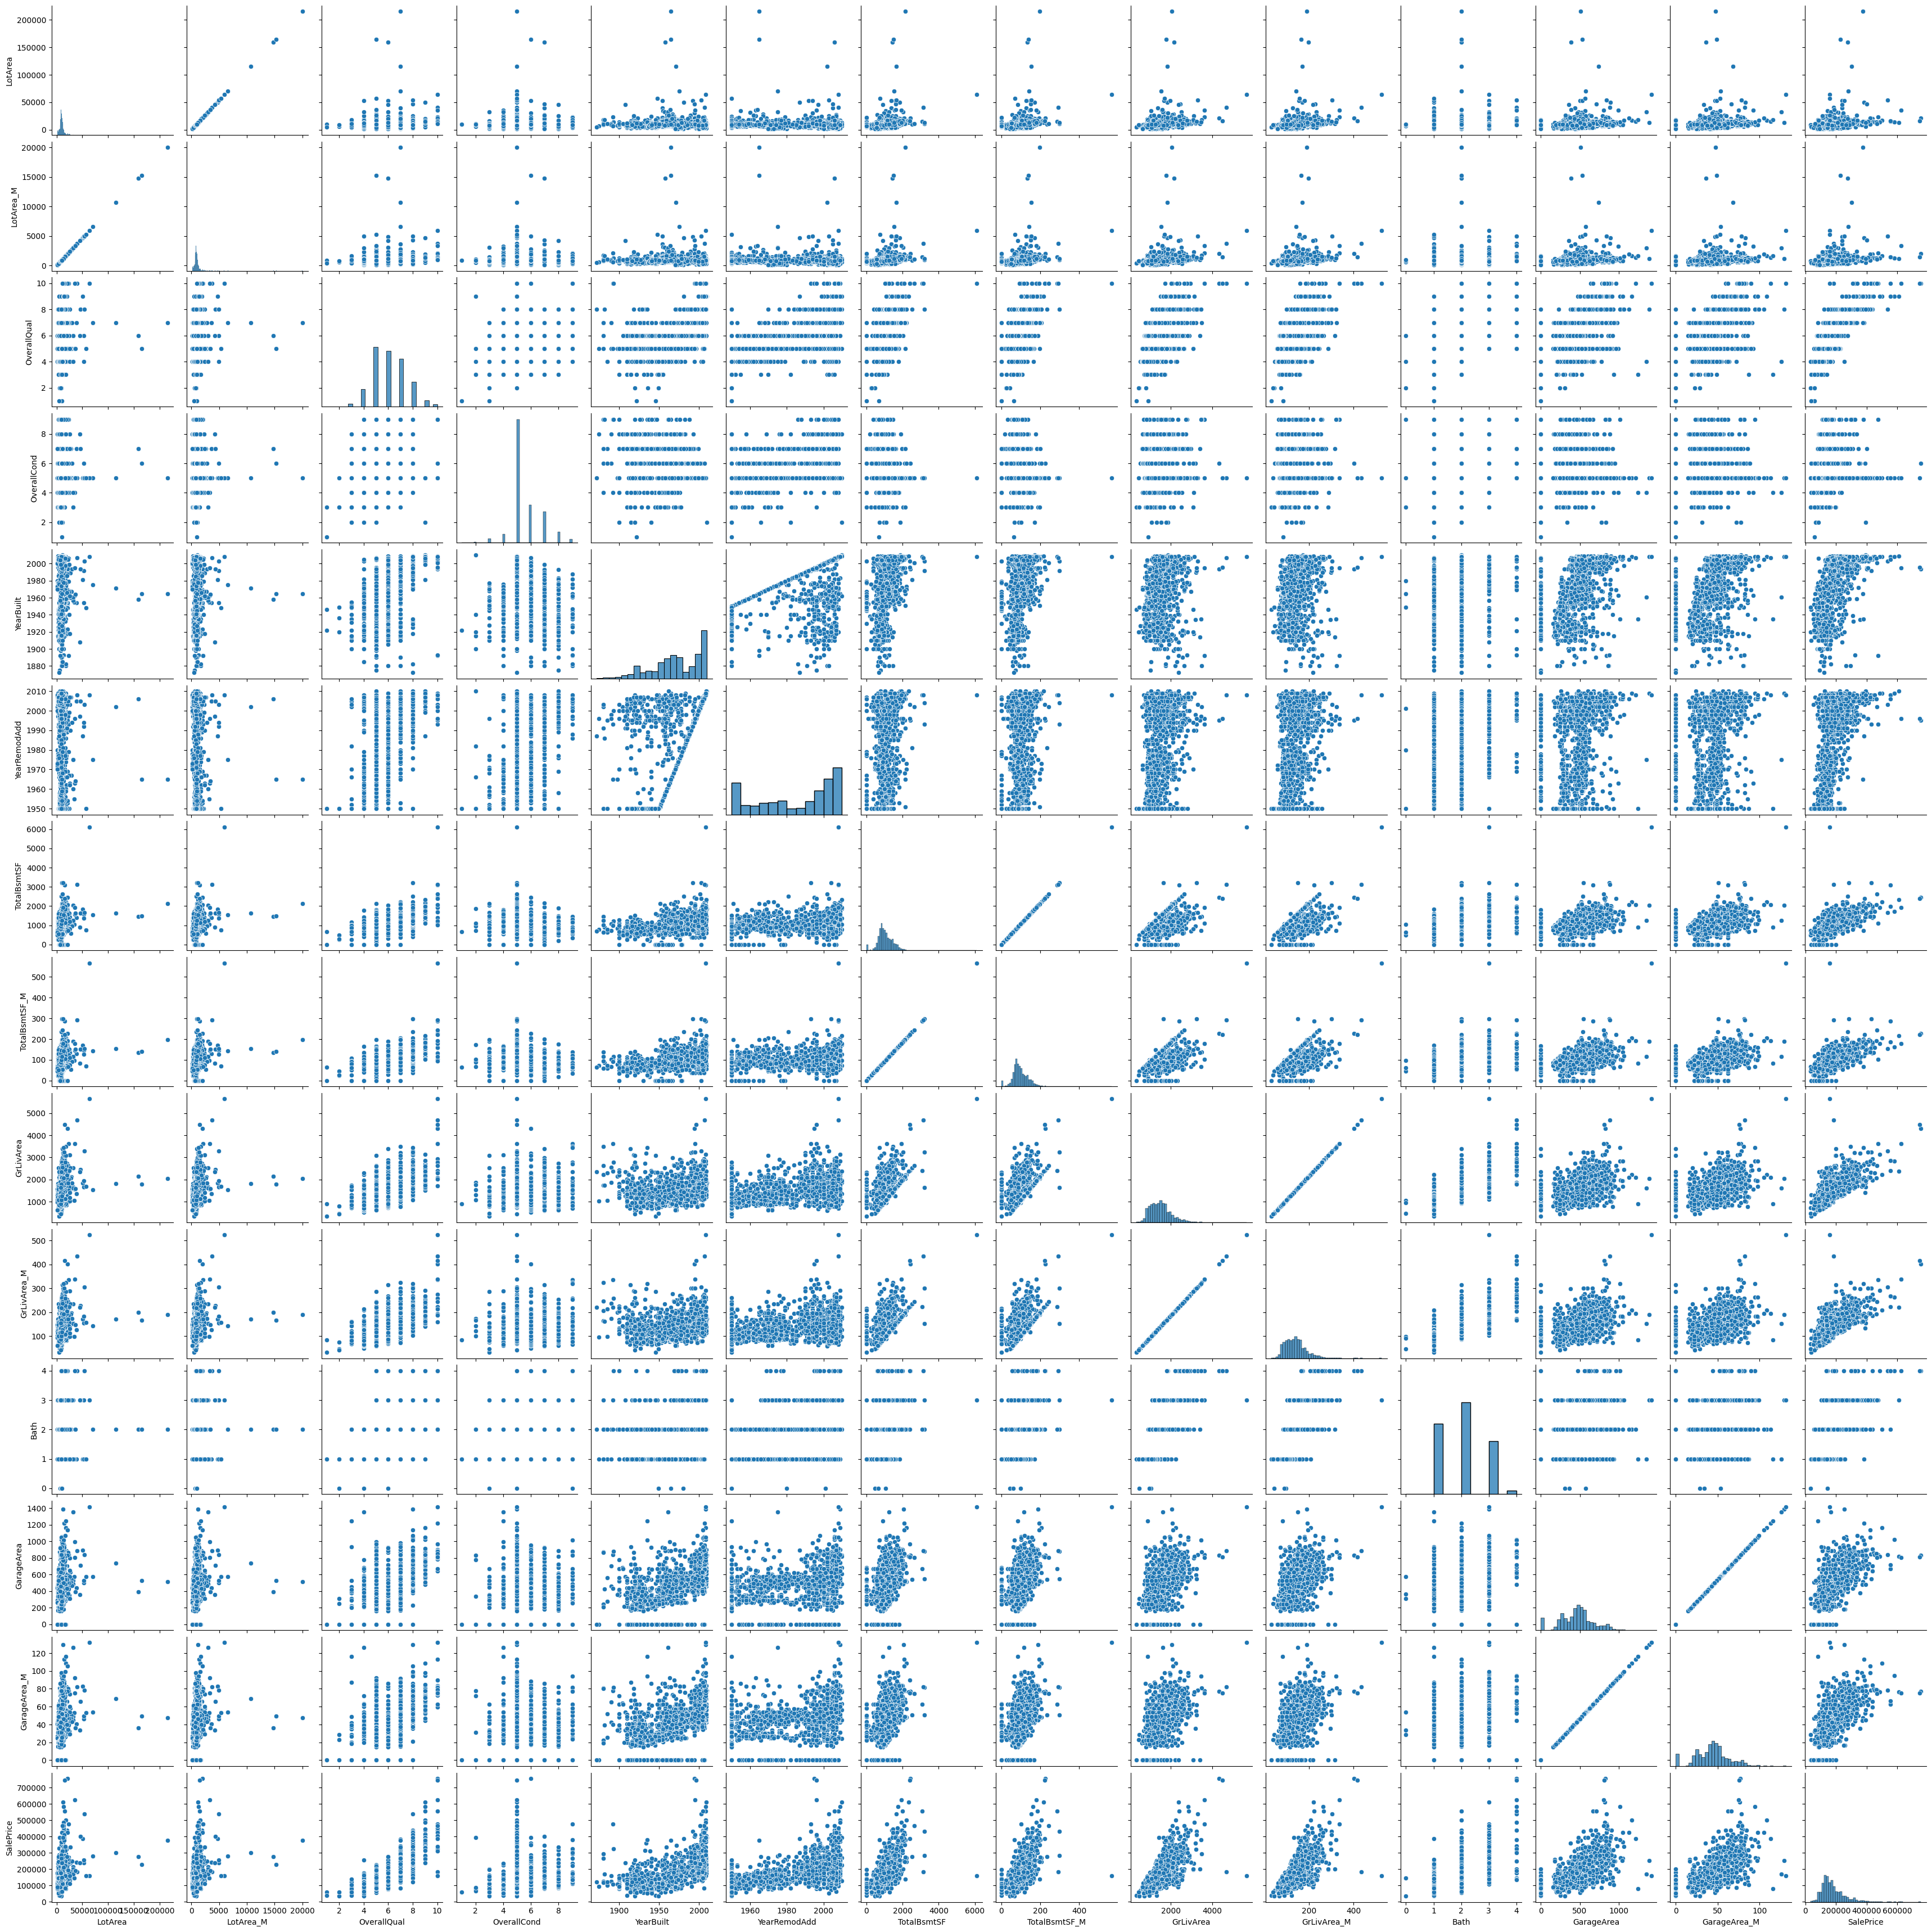

In [74]:
sns.pairplot(df)

In [75]:
df.dtypes

LotArea            int64
LotArea_M        float64
Street            object
BldgType          object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
ExterQual         object
ExterCond         object
Foundation        object
TotalBsmtSF        int64
TotalBsmtSF_M    float64
Heating           object
HeatingQC         object
CentralAir        object
GrLivArea          int64
GrLivArea_M      float64
Bath               int64
KitchenQual       object
GarageArea         int64
GarageArea_M     float64
DateSold          object
SaleCondition     object
SalePrice          int64
dtype: object

In [76]:
numeric = df.select_dtypes(include=['int', 'float']).columns.tolist()
category = df.select_dtypes(include=['object']).columns.tolist()
numeric
category

['Street',
 'BldgType',
 'RoofStyle',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'DateSold',
 'SaleCondition']

In [77]:
# Выведите описательные статистики для числовых признаков.
df[numeric].describe()

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,977.044879,6.099315,5.575342,1971.267808,1984.865753,1057.429452,98.238368,1515.463699,140.791124,1.947945,472.980137,43.941274,180921.195890
std,9981.264932,927.289456,1.382997,1.112799,30.202904,20.645407,438.705324,40.757041,525.480383,48.818704,0.794965,213.804841,19.863111,79442.502883
min,1300.000000,120.773900,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,31.029602,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,701.742811,5.000000,5.000000,1954.000000,1967.000000,795.750000,73.927562,1129.500000,104.933938,1.000000,334.500000,31.076054,129975.000000
50%,9478.500000,880.581085,6.000000,5.000000,1973.000000,1994.000000,991.500000,92.113325,1464.000000,136.009992,2.000000,480.000000,44.593440,163000.000000
75%,11601.500000,1077.814155,7.000000,6.000000,2000.000000,2004.000000,1298.250000,120.611320,1776.750000,165.065405,3.000000,576.000000,53.512128,214000.000000
max,215245.000000,19996.906235,10.000000,9.000000,2010.000000,2010.000000,6110.000000,567.637330,5642.000000,524.158726,4.000000,1418.000000,131.736454,755000.000000


2. Постройте матрицу корреляций числовых признаков. Удалите линейно-зависимые признаки из данных.

In [78]:
df[numeric].corr()

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
LotArea,1.000000,1.000000,0.105806,-0.005636,0.014228,0.013788,0.260833,0.260833,0.263116,0.263116,0.096360,0.180403,0.180403,0.263843
LotArea_M,1.000000,1.000000,0.105806,-0.005636,0.014228,0.013788,0.260833,0.260833,0.263116,0.263116,0.096360,0.180403,0.180403,0.263843
OverallQual,0.105806,0.105806,1.000000,-0.091932,0.572323,0.550684,0.537808,0.537808,0.593007,0.593007,0.554555,0.562022,0.562022,0.790982
OverallCond,-0.005636,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.171098,-0.171098,-0.079686,-0.079686,-0.172989,-0.151521,-0.151521,-0.077856
YearBuilt,0.014228,0.014228,0.572323,-0.375983,1.000000,0.592855,0.391452,0.391452,0.199010,0.199010,0.478016,0.478954,0.478954,0.522897
YearRemodAdd,0.013788,0.013788,0.550684,0.073741,0.592855,1.000000,0.291066,0.291066,0.287389,0.287389,0.420235,0.371600,0.371600,0.507101
TotalBsmtSF,0.260833,0.260833,0.537808,-0.171098,0.391452,0.291066,1.000000,1.000000,0.454868,0.454868,0.193469,0.486665,0.486665,0.613581
TotalBsmtSF_M,0.260833,0.260833,0.537808,-0.171098,0.391452,0.291066,1.000000,1.000000,0.454868,0.454868,0.193469,0.486665,0.486665,0.613581
GrLivArea,0.263116,0.263116,0.593007,-0.079686,0.199010,0.287389,0.454868,0.454868,1.000000,1.000000,0.699614,0.468997,0.468997,0.708624
GrLivArea_M,0.263116,0.263116,0.593007,-0.079686,0.199010,0.287389,0.454868,0.454868,1.000000,1.000000,0.699614,0.468997,0.468997,0.708624


In [79]:
print(df.shape)
col_to_drop = ['LotArea', 'TotalBsmtSF', 'GrLivArea','GarageArea']
df = df.drop(col_to_drop, axis=1)
df.shape

(1460, 26)


(1460, 22)

3. Посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной.

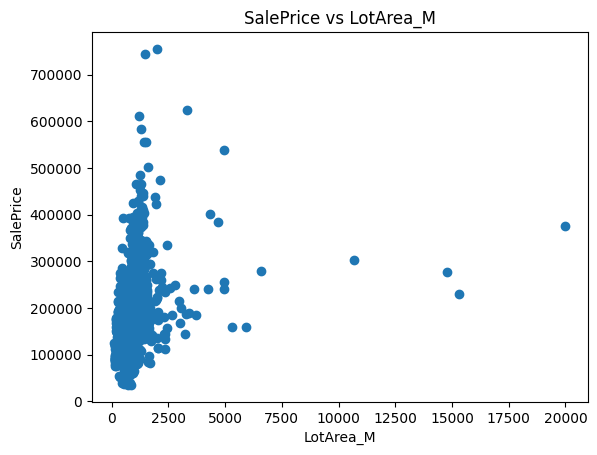

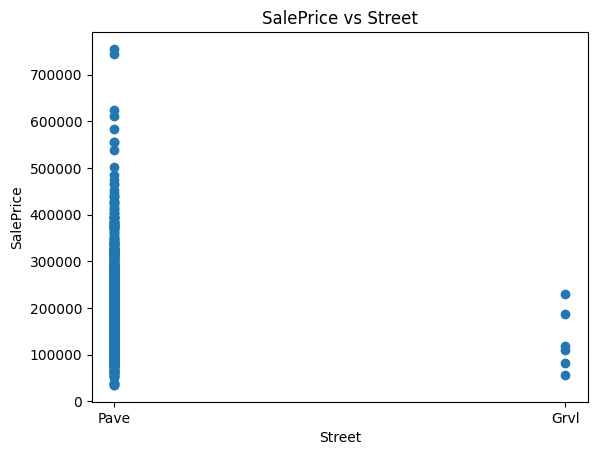

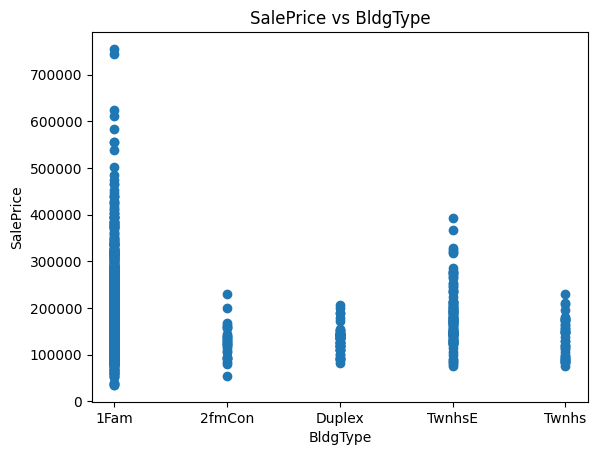

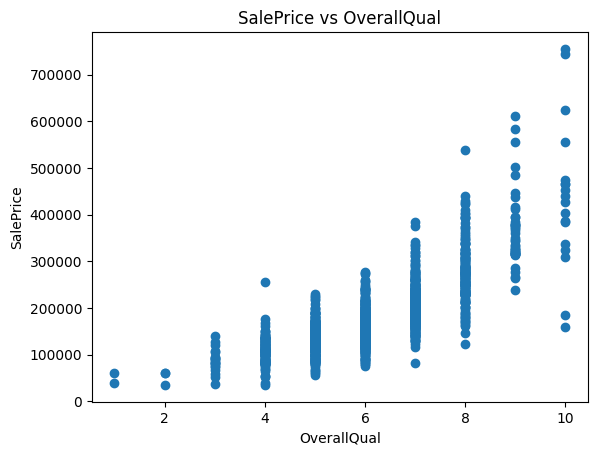

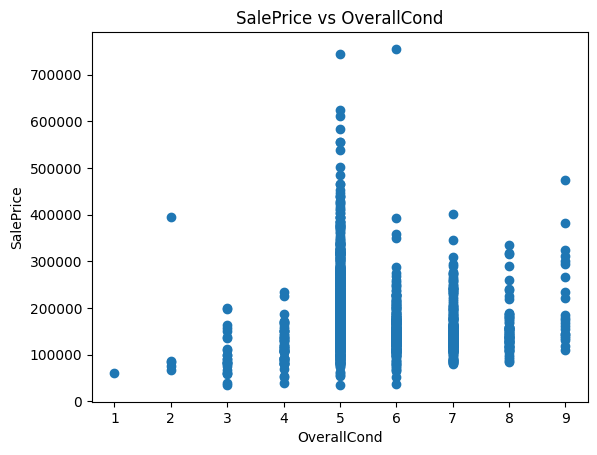

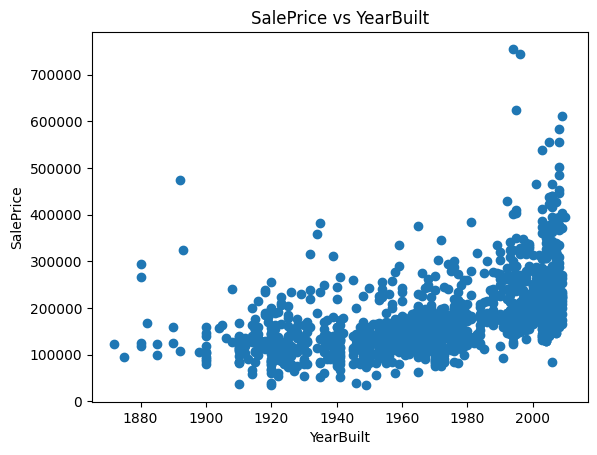

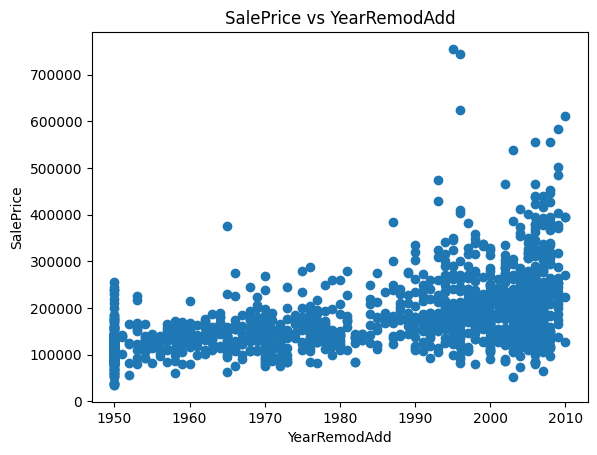

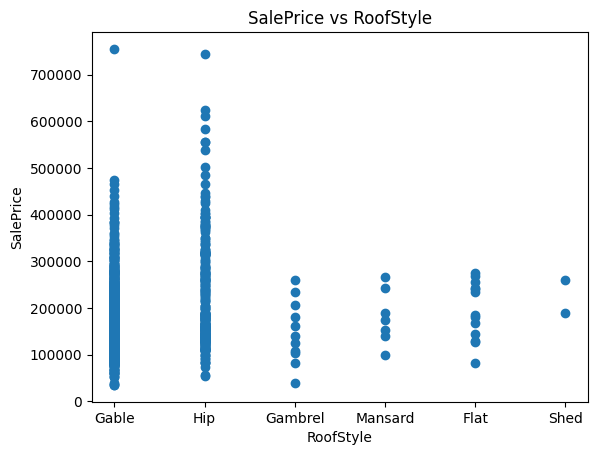

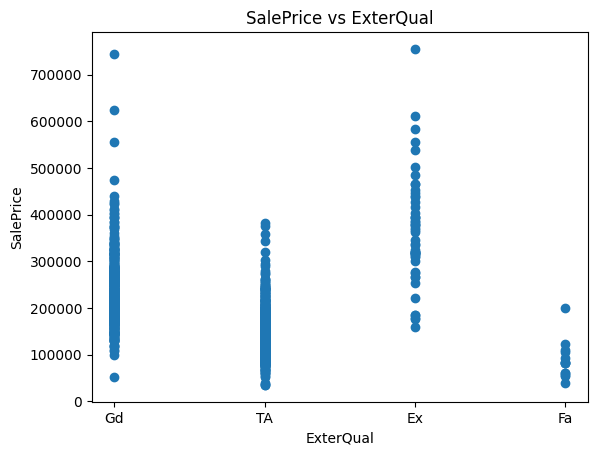

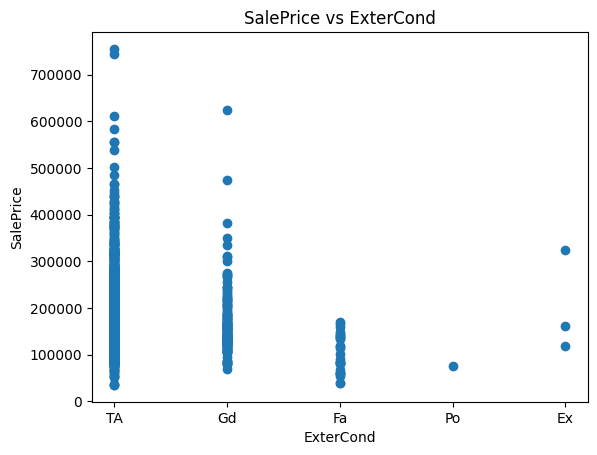

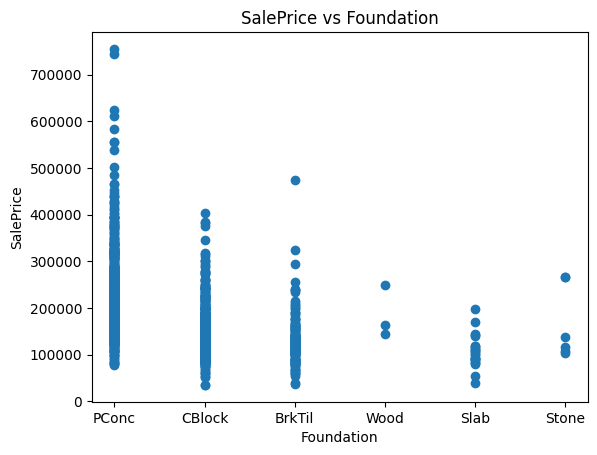

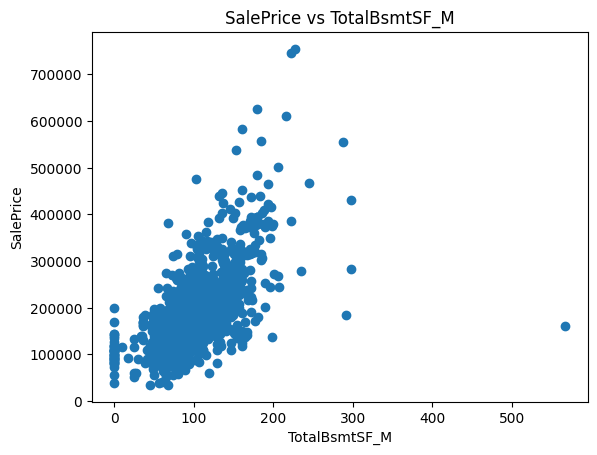

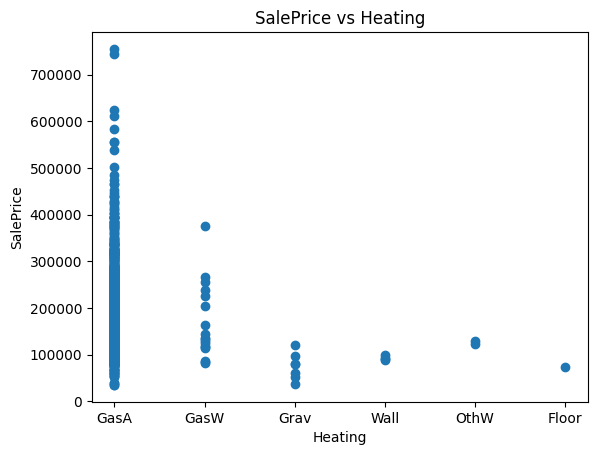

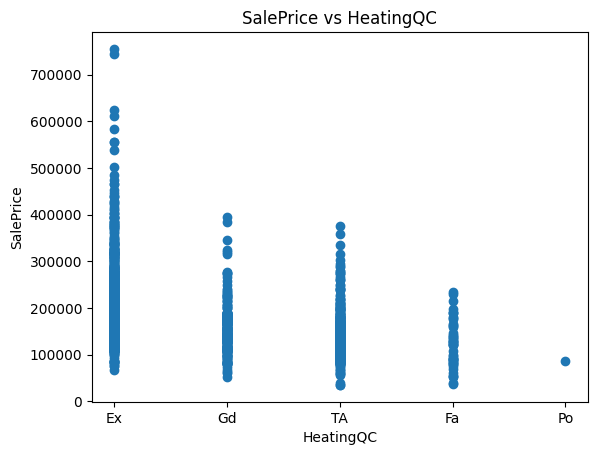

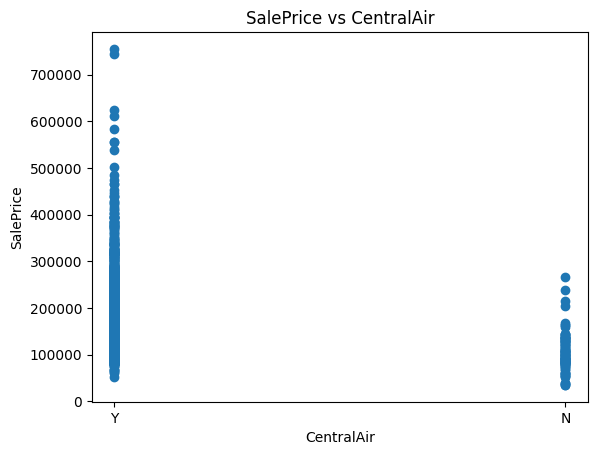

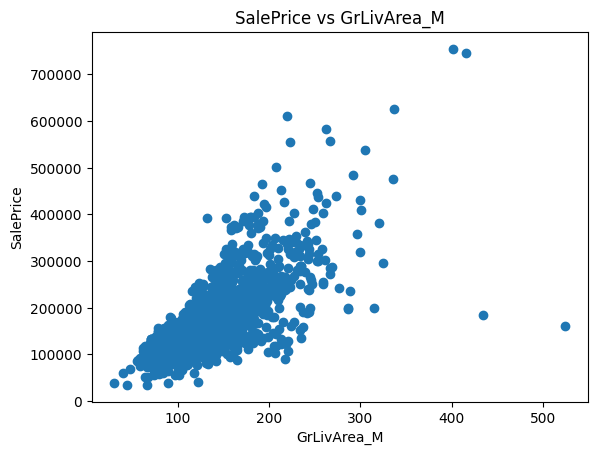

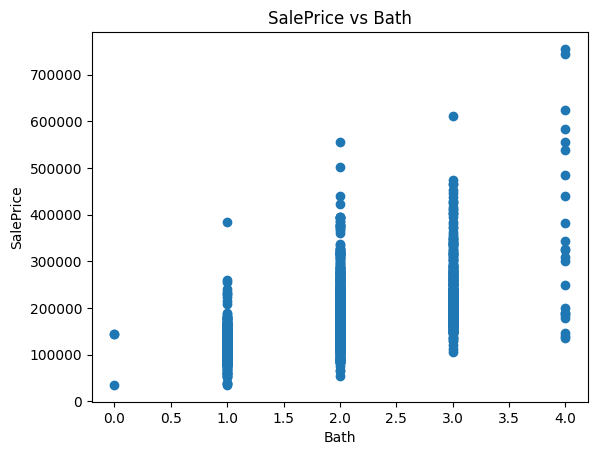

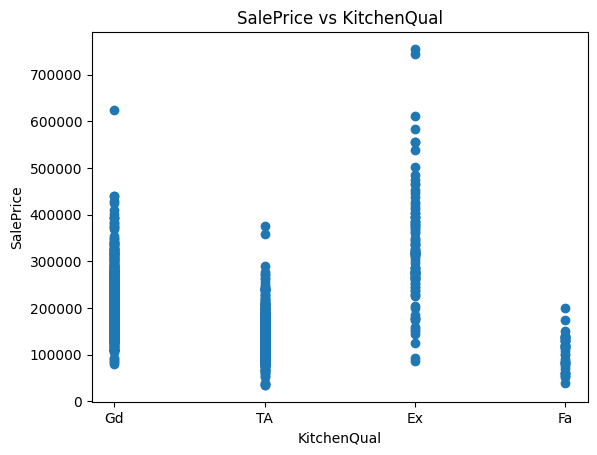

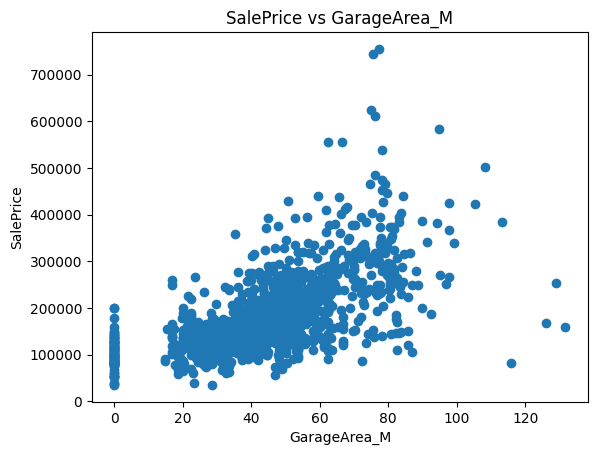

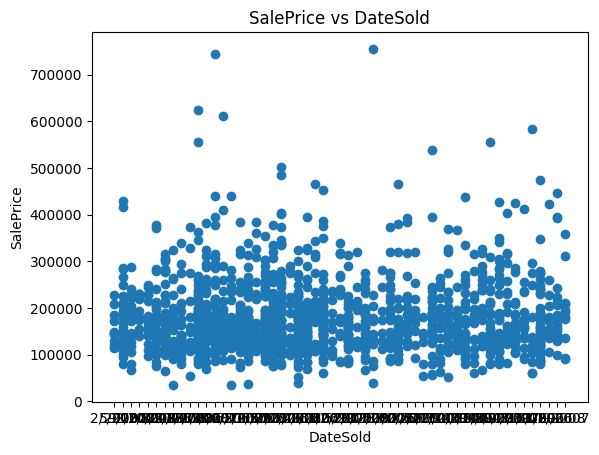

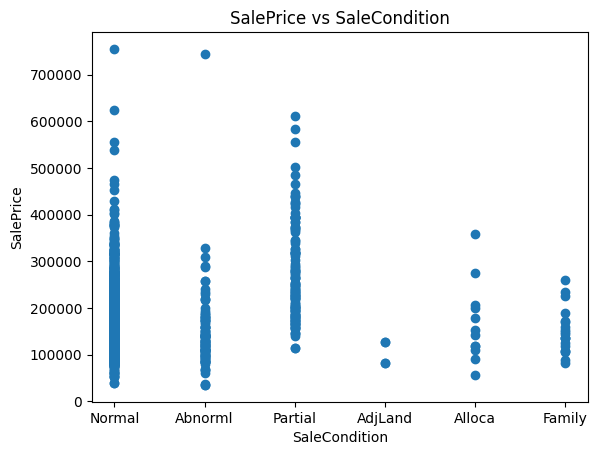

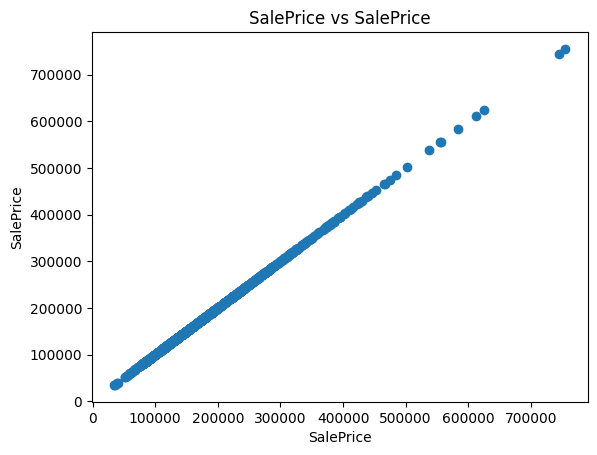

In [80]:
# Цикл по всем столбцам датафрейма
for column in df.columns:
    # Построение графика зависимости SalePrice от текущего столбца
    plt.scatter(df[column], df['SalePrice'])
    plt.xlabel(column)
    plt.ylabel('SalePrice')
    plt.title(f'SalePrice vs {column}')
    plt.show()

4. Сделайте предварительные выводы.

LotArea - имеет незначительное влияние
OverallQual - имеет значительную зависимость
YearBuilt -имеет среднюю зависимость
DateSold - практически не влияет на целевую переменную

In [81]:
# создаем временный датасет
# преобразуем данные
df_sur = df.copy() # создаем копию!
for i in df_sur.columns:
    df_sur[i] = df_sur[i].astype('category').cat.codes
# выводим корреляцию
col_min_corr = []
for i in df_sur.columns:
    j = df_sur[i]
    corr = df_sur['SalePrice'].corr(j)
    if -0.001 < corr and corr < 0.001:
        col_min_corr.append(i)
    print( i, round(df_sur['SalePrice'].corr(j), 4))
print('min_corr', col_min_corr)

LotArea_M 0.4656
Street 0.0439
BldgType -0.0764
OverallQual 0.8169
OverallCond -0.083
YearBuilt 0.6179
YearRemodAdd 0.5793
RoofStyle 0.1697
ExterQual -0.6077
ExterCond 0.1369
Foundation 0.4335
TotalBsmtSF_M 0.634
Heating -0.1209
HeatingQC -0.4494
CentralAir 0.2981
GrLivArea_M 0.7369
Bath 0.6315
KitchenQual -0.5557
GarageArea_M 0.6636
DateSold 0.0156
SaleCondition 0.2363
SalePrice 1.0
min_corr []


* **LotArea** — размер участка в квадратных футах.
* **LotArea_M** — размер участка в квадратных метрах.
* **Street** — тип доступа к дороге.
* **BldgType** — тип жилья.
* **OverallQual** — общее качество материала и отделки.
* **OverallCond** — общая оценка состояния.
* **YearBuilt** — первоначальная дата постройки.
* **YearRemodAdd** — дата реконструкции.
* **RoofStyle** — тип крыши.
* **ExterQual** — качество материалов снаружи.
* **ExterCond** — текущее состояние материалов снаружи.
* **Foundation** — тип фундамента.
* **TotalBsmtSF** — общая площадь подвала в квадратных футах.
* **TotalBsmtSF_M** — общая площадь подвала в квадратных метрах.
* **Heating** — тип отопления.
* **HeatingQC** — качество и состояние отопления.
* **CentralAir** — кондиционирование.
* **GrLivArea** — жилая площадь в квадратных футах.
* **GrLivArea_M** — жилая площадь в квадратных метрах.
* **Bath** — количество ванных комнат.
* **KitchenQual** — качество кухни.
* **GarageArea** — площадь гаража в квадратных футах.
* **GarageArea_M** — площадь гаража в квадратных метрах.
* **DateSold** — месяц и год продажи.
* **SaleCondition** — условия сделки.
* **SalePrice** — стоимость продажи в долларах. Это целевая переменная, которую нам нужно предсказать.

5. Создайте дополнительные переменные из уже имеющихся, обоснуйте свои решения.

In [82]:
df.head()

,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,ExterCond,...,Heating,HeatingQC,CentralAir,GrLivArea_M,Bath,KitchenQual,GarageArea_M,DateSold,SaleCondition,SalePrice
0,785.03035,Pave,1Fam,7,5,2003,2003,Gable,Gd,TA,...,GasA,Ex,Y,158.864130,3,Gd,50.910844,2/2008,Normal,208500
1,891.86880,Pave,1Fam,6,8,1976,1976,Gable,TA,TA,...,GasA,Ex,Y,117.243586,2,TA,42.735380,5/2007,Normal,181500
2,1045.15875,Pave,1Fam,7,5,2001,2002,Gable,Gd,TA,...,GasA,Ex,Y,165.924758,3,Gd,56.485024,9/2008,Normal,223500
3,887.22365,Pave,1Fam,7,5,1915,1970,Gable,TA,TA,...,GasA,Gd,Y,159.514451,1,Gd,59.643726,2/2006,Abnorml,140000
4,1324.79678,Pave,1Fam,8,5,2000,2000,Gable,Gd,TA,...,GasA,Ex,Y,204.200794,3,Gd,77.666908,12/2008,Normal,250000


In [83]:
df.dtypes

LotArea_M        float64
Street            object
BldgType          object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
ExterQual         object
ExterCond         object
Foundation        object
TotalBsmtSF_M    float64
Heating           object
HeatingQC         object
CentralAir        object
GrLivArea_M      float64
Bath               int64
KitchenQual       object
GarageArea_M     float64
DateSold          object
SaleCondition     object
SalePrice          int64
dtype: object

Создадим два новых признака: возраст дома и возраст реконструкции

In [84]:
# Извлечь последние 4 символа из каждой строки в колонке 'DateSold'
df['DateSold'] = df['DateSold'].str[-4:]
# Преобразовать значения в колонке 'DateSold' в целочисленный тип
df['DateSold'] = df['DateSold'].astype(int)
# создадим возраст дома
df['OldHouse'] = df['DateSold'] - df['YearBuilt']
# создадим возраст ремонта
df['OldRemond'] = df['DateSold'] - df['YearRemodAdd']
# дропнем исходные колонки
col_to_drop = ['DateSold', 'YearBuilt', 'YearRemodAdd']
df = df.drop(col_to_drop, axis=1)


In [85]:
# посмотрим на наши данные и их значения
for i in list(df):
    print('Характеристика:', i)
    print('type', df[i].dtype)
    print('Количество уникальных значений:', df[i].nunique())
    print(':-)')

Характеристика: LotArea_M
type float64
Количество уникальных значений: 1073
:-)
Характеристика: Street
type object
Количество уникальных значений: 2
:-)
Характеристика: BldgType
type object
Количество уникальных значений: 5
:-)
Характеристика: OverallQual
type int64
Количество уникальных значений: 10
:-)
Характеристика: OverallCond
type int64
Количество уникальных значений: 9
:-)
Характеристика: RoofStyle
type object
Количество уникальных значений: 6
:-)
Характеристика: ExterQual
type object
Количество уникальных значений: 4
:-)
Характеристика: ExterCond
type object
Количество уникальных значений: 5
:-)
Характеристика: Foundation
type object
Количество уникальных значений: 6
:-)
Характеристика: TotalBsmtSF_M
type float64
Количество уникальных значений: 721
:-)
Характеристика: Heating
type object
Количество уникальных значений: 6
:-)
Характеристика: HeatingQC
type object
Количество уникальных значений: 5
:-)
Характеристика: CentralAir
type object
Количество уникальных значений: 2
:-)
Ха

## Задание 4 

Подготовьте данные:

1. Разделите данные на тренировочную и тестовую выборки.

In [86]:
df_clean = df

In [87]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

2. Закодируйте категориальные признаки в тренировочной и тестовой выборках.

In [88]:
category = df.select_dtypes(include=['object']).columns.tolist()
category

['Street',
 'BldgType',
 'RoofStyle',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'SaleCondition']

In [89]:
# Применяем One-Hot Encoding с помощью pd.get_dummies
encoded_df = pd.get_dummies(x_train[category])
# Объединяем исходный датафрейм и закодированные признаки
x_train = pd.concat([x_train, encoded_df], axis=1)
x_train = x_train.drop(category, axis=1)
x_train.shape

(1022, 60)

In [90]:
# Применяем One-Hot Encoding с помощью pd.get_dummies
encoded_df = pd.get_dummies(x_test[category])
# Объединяем исходный датафрейм и закодированные признаки
x_test = pd.concat([x_test, encoded_df], axis=1)
x_test = x_test.drop(category, axis=1)
x_test.shape

(438, 53)

In [91]:
# Находим различия по колонкам
columns_diff = set(x_test.columns) ^ set(x_train.columns)
col_to_drop = []
# Выводим названия колонок, которые отсутствуют в одном из датасетов
for col in columns_diff:
    if col not in x_test.columns:
        col_to_drop.append(col)
        print(f'Колонка {col} отсутствует в df_test')
    if col not in x_train.columns:
        col_to_drop.append(col)
        print(f'Колонка {col} отсутствует в df_train')

print(col_to_drop)

Колонка ExterCond_Po отсутствует в df_test
Колонка RoofStyle_Shed отсутствует в df_test
Колонка Foundation_Wood отсутствует в df_test
Колонка SaleCondition_AdjLand отсутствует в df_test
Колонка Heating_OthW отсутствует в df_test
Колонка Heating_Floor отсутствует в df_test
Колонка HeatingQC_Po отсутствует в df_test
['ExterCond_Po', 'RoofStyle_Shed', 'Foundation_Wood', 'SaleCondition_AdjLand', 'Heating_OthW', 'Heating_Floor', 'HeatingQC_Po']


Сидел с этим (разделенные данные дают разное количество признаков) долго и нудно 

ничего лучшего чем дропнуть лишнее не придумал

In [92]:
x_train = x_train.drop(col_to_drop, axis=1)

3. Подготовьте числовые признаки в тренировочной и тестовой выборках к передаче в модель: приведите их к единому масштабу.

In [93]:
numeric = df.select_dtypes(include=['int', 'float']).columns.tolist()
numeric.remove('SalePrice')
print(numeric)


['LotArea_M', 'OverallQual', 'OverallCond', 'TotalBsmtSF_M', 'GrLivArea_M', 'Bath', 'GarageArea_M', 'OldHouse', 'OldRemond']


In [94]:
x_train[numeric] = preprocessing.normalize(x_train[numeric])
x_train.head()

,LotArea_M,OverallQual,OverallCond,TotalBsmtSF_M,GrLivArea_M,Bath,GarageArea_M,OldHouse,OldRemond,Street_Grvl,...,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,0.976987,0.007078,0.006067,0.122499,0.158009,0.002022,0.049789,0.038425,0.038425,False,...,True,False,False,False,True,False,False,False,True,False
1452,0.941510,0.013788,0.013788,0.140138,0.274639,0.002758,0.134501,0.002758,0.002758,False,...,True,False,False,False,True,False,False,False,True,False
762,0.978280,0.008531,0.006094,0.085599,0.175162,0.003656,0.069521,0.001219,0.001219,False,...,True,False,False,True,False,False,False,False,True,False
932,0.972227,0.008071,0.004484,0.158705,0.158705,0.001793,0.065648,0.000897,0.000897,False,...,True,True,False,False,False,False,False,False,True,False
435,0.983919,0.006950,0.005957,0.073699,0.153210,0.002979,0.050732,0.012907,0.012907,False,...,True,False,False,True,False,False,False,False,True,False


In [95]:
x_test[numeric] = preprocessing.normalize(x_test[numeric])
x_test.head()

,LotArea_M,OverallQual,OverallCond,TotalBsmtSF_M,GrLivArea_M,Bath,GarageArea_M,OldHouse,OldRemond,Street_Grvl,...,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,0.982404,0.007541,0.010054,0.123647,0.124698,0.001257,0.030824,0.054041,0.003770,False,...,True,False,False,False,True,False,False,False,True,False
1105,0.969532,0.006812,0.004257,0.115733,0.207418,0.002554,0.056324,0.013624,0.012772,False,...,True,False,False,True,False,False,False,False,True,False
413,0.979329,0.005882,0.007059,0.110174,0.112360,0.001176,0.039348,0.097649,0.070590,False,...,True,False,False,False,True,False,False,False,True,False
522,0.917002,0.011845,0.013819,0.184134,0.305178,0.003948,0.077028,0.116472,0.110550,False,...,True,False,False,False,True,False,False,False,True,False
1036,0.982173,0.007377,0.004098,0.123362,0.123362,0.001639,0.069448,0.001639,0.000820,False,...,True,True,False,False,False,False,False,False,True,False


## Задание 5

Займитесь обучением модели:

1. Обучите модель линейной регрессии без регуляризации. Посмотрите на веса полученной модели. Сделайте предсказания по обучающей и тестовой выборкам.

In [96]:
# Без регуляризации
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [97]:
# вывод точности предсказания
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

# коэффициенты модели
print('w_0:', model.intercept_)
print('w_i:', model.coef_)

0.679698820708198
0.6923272408018413
w_0: 174978.25681027502
w_i: [-3.25926528e+04 -3.94351081e+06 -3.32533416e+06  4.71537916e+03
  4.31877801e+05 -4.23390135e+06 -3.79263364e+03 -3.84802639e+05
  1.99310191e+04  1.65926431e+04 -1.65926431e+04  1.60536037e+04
  7.06560269e+03 -9.81973583e+03 -1.63194894e+03 -1.16675216e+04
 -1.27568151e+04 -3.66650815e+04 -3.56937751e+04 -2.07495810e+04
 -1.84264407e+04  5.54529082e+04 -3.89265272e+04  6.07858955e+03
 -2.26049705e+04  9.60211362e+04  8.00859190e+04  9.64102163e+04
  9.16864076e+04  9.06962173e+02 -3.69507468e+03 -9.72484726e+02
 -4.26232366e+04 -7.55470219e+03  1.99399905e+04  3.90387529e+04
  7.62060721e+03  4.40005515e+04 -2.24846738e+04 -1.78251662e+04
 -3.01465059e+04 -2.39822521e+04 -1.24032938e+04  1.24032938e+04
  6.39725037e+04 -3.18231899e+04 -3.09755152e+03 -2.90517623e+04
 -1.75411845e+03  6.23503022e+04 -1.23099972e+03  1.04366955e+04
  2.28791910e+04]


In [98]:

y_predict_train = model.predict(x_train)
y_predict_test = model.predict(x_test)

In [99]:
train_mae = mean_absolute_error(y_train, y_predict_train)
test_mae = mean_absolute_error(y_test, y_predict_test)
print("Train MAE: {}".format(train_mae))
print("Test MAE: {}".format(test_mae))

train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

r2_train = r2_score(y_train, y_predict_train)
r2_test = r2_score(y_test, y_predict_test)
print("Коэфф детерминации (r2) train:", r2_train)
print("Коэфф детерминации (r2) test:", r2_test)

Train MAE: 29256.63465759597
Test MAE: 31774.428228671182
Train MSE: 1927756820.0287542
Test MSE: 2146969361.3716528
Коэфф детерминации (r2) train: 0.679698820708198
Коэфф детерминации (r2) test: 0.6923272408018413


 К заданию не относится, захотелось поиграться

In [100]:
df = df_clean
numeric = df.select_dtypes(include=['int', 'float']).columns.tolist()
category = df.select_dtypes(include=['object']).columns.tolist()
print(numeric)
print(category)
encoded_df = pd.get_dummies(df[category], prefix='category')
# Объединяем исходный датафрейм и закодированные признаки
df = pd.concat([df, encoded_df], axis=1)

numeric.remove('SalePrice')
df[numeric] = preprocessing.normalize(df[numeric])
df.shape

['LotArea_M', 'OverallQual', 'OverallCond', 'TotalBsmtSF_M', 'GrLivArea_M', 'Bath', 'GarageArea_M', 'SalePrice', 'OldHouse', 'OldRemond']
['Street', 'BldgType', 'RoofStyle', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'SaleCondition']


(1460, 72)

In [101]:

df = df.drop(category, axis=1)
df.shape

(1460, 61)

In [102]:
X_s = df.drop('SalePrice', axis=1)
y_s = df['SalePrice']

In [103]:
# обучить модель линейной регрессии циклом для каждой отдельной переменной и 
# проверить качество модели на обучающей и тестовой выборках с помощью MAE, MSE, R^2
model = LinearRegression()
for i in X_s.columns:
    xs_train, xs_test, ys_train, ys_test = train_test_split(X_s[[i]], y_s, test_size=0.3, random_state=42)
    model.fit(xs_train, ys_train)
    y_predict_train = model.predict(xs_train)
    y_predict_test = model.predict(xs_test)

    print('-'*10, i, '-'*10)
    
    train_mae = mean_absolute_error(ys_train, y_predict_train)
    test_mae = mean_absolute_error(ys_test, y_predict_test)
    print("Train MAE: {}".format(train_mae))
    print("Test MAE: {}".format(test_mae))

    train_mse = mean_squared_error(ys_train, y_predict_train)
    test_mse = mean_squared_error(ys_test, y_predict_test)
    print("Train MSE: {}".format(train_mse))
    print("Test MSE: {}".format(test_mse))

    r2_train = r2_score(ys_train, y_predict_train)
    r2_test = r2_score(ys_test, y_predict_test)
    print("Коэфф детерминации (r2) train:", r2_train)
    print("Коэфф детерминации (r2) test:", r2_test)

---------- LotArea_M ----------
Train MAE: 56401.38105550098
Test MAE: 59798.509253513475
Train MSE: 5958440607.293995
Test MSE: 6961371028.68366
Коэфф детерминации (r2) train: 0.00999154383592804
Коэфф детерминации (r2) test: 0.0023964613873854734
---------- OverallQual ----------
Train MAE: 56598.80148934172
Test MAE: 59840.83878286108
Train MSE: 5976770504.739926
Test MSE: 6972791481.404553
Коэфф детерминации (r2) train: 0.006945989693812771
Коэфф детерминации (r2) test: 0.0007598464159986884
---------- OverallCond ----------
Train MAE: 53092.43552153133
Test MAE: 56968.968834362895
Train MSE: 5291963117.662401
Test MSE: 6320726801.913994
Коэфф детерминации (r2) train: 0.12072829428210485
Коэфф детерминации (r2) test: 0.09420437465386333
---------- TotalBsmtSF_M ----------
Train MAE: 56649.23687653385
Test MAE: 59155.82826626744
Train MSE: 5994064642.008875
Test MSE: 6918227937.825531
Коэфф детерминации (r2) train: 0.004072529460381502
Коэфф детерминации (r2) test: 0.008579108444899

---------- category_Flat ----------
Train MAE: 56635.765803522925
Test MAE: 59505.97712830101
Train MSE: 6016497126.365225
Test MSE: 6978903507.628228
Коэфф детерминации (r2) train: 0.00034532117397712003
Коэфф детерминации (r2) test: -0.0001160412451686188
---------- category_Gable ----------
Train MAE: 56387.14221229867
Test MAE: 58675.0842912885
Train MSE: 5715841311.279222
Test MSE: 6625627397.876543
Коэфф детерминации (r2) train: 0.0502999685301454
Коэфф детерминации (r2) test: 0.050510408019412756
---------- category_Gambrel ----------
Train MAE: 56650.63857115597
Test MAE: 59612.30591353501
Train MSE: 6012214658.906481
Test MSE: 6969490148.665948
Коэфф детерминации (r2) train: 0.0010568628804118463
Коэфф детерминации (r2) test: 0.0012329459259372566
---------- category_Hip ----------
Train MAE: 56402.80841668513
Test MAE: 58733.24460853228
Train MSE: 5686075922.348555
Test MSE: 6587191252.698414
Коэфф детерминации (r2) train: 0.05524555558631239
Коэфф детерминации (r2) test: 0.0

In [104]:
# обучить модель линейной регрессии циклом при исключении по очереди каждой отдельной переменной
var = df.columns.tolist()
for i in var:
  var_new = var.copy()
  var_new.remove(i)

  print('-'*10, ' + '.join(var_new), '-'*10)
  print(len(var_new))
  train_Xs = df[var_new]
  train_ys = df[['SalePrice']]

  model = LinearRegression() 
  model.fit(train_Xs, train_ys)

  y_predict_train = model.predict(train_Xs)

  train_mse = mean_squared_error(train_ys, y_predict_train)
  print("Train MSE: {}".format(train_mse))

  train_mae = mean_absolute_error(train_ys, y_predict_train)
  print("Train MAE: {}".format(train_mae))

  train_r2 = r2_score(train_ys, y_predict_train)
  print("Train R2: {}".format(train_r2))
  print()

---------- OverallQual + OverallCond + TotalBsmtSF_M + GrLivArea_M + Bath + GarageArea_M + SalePrice + OldHouse + OldRemond + category_Grvl + category_Pave + category_1Fam + category_2fmCon + category_Duplex + category_Twnhs + category_TwnhsE + category_Flat + category_Gable + category_Gambrel + category_Hip + category_Mansard + category_Shed + category_Ex + category_Fa + category_Gd + category_TA + category_Ex + category_Fa + category_Gd + category_Po + category_TA + category_BrkTil + category_CBlock + category_PConc + category_Slab + category_Stone + category_Wood + category_Floor + category_GasA + category_GasW + category_Grav + category_OthW + category_Wall + category_Ex + category_Fa + category_Gd + category_Po + category_TA + category_N + category_Y + category_Ex + category_Fa + category_Gd + category_TA + category_Abnorml + category_AdjLand + category_Alloca + category_Family + category_Normal + category_Partial ----------
60
Train MSE: 4.267581151290566e-21
Train MAE: 4.1991245

2. Понаблюдайте, как ведёт себя модель с L1-регуляризацией (Lasso). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Lasso.

Здесь я все_таки (на втором, третьем, пятом круге))))) решил воспользоваться полным набором признаков
то_есть сначала делаю кодировку и нормализацию признаков, 
и только потом их разделяю, очень хочется посмотреть на различие результатов

In [105]:
df_clean.columns

Index(['LotArea_M', 'Street', 'BldgType', 'OverallQual', 'OverallCond',
       'RoofStyle', 'ExterQual', 'ExterCond', 'Foundation', 'TotalBsmtSF_M',
       'Heating', 'HeatingQC', 'CentralAir', 'GrLivArea_M', 'Bath',
       'KitchenQual', 'GarageArea_M', 'SaleCondition', 'SalePrice', 'OldHouse',
       'OldRemond'],
      dtype='object')

In [106]:
df = df_clean
numeric = df.select_dtypes(include=['int', 'float']).columns.tolist()
category = df.select_dtypes(include=['object']).columns.tolist()
print(numeric)
print(category)
encoded_df = pd.get_dummies(df[category], prefix='category')
# Объединяем исходный датафрейм и закодированные признаки
df = pd.concat([df, encoded_df], axis=1)

numeric.remove('SalePrice')
df[numeric] = preprocessing.normalize(df[numeric])
df = df.drop(category, axis=1)
df.shape

['LotArea_M', 'OverallQual', 'OverallCond', 'TotalBsmtSF_M', 'GrLivArea_M', 'Bath', 'GarageArea_M', 'SalePrice', 'OldHouse', 'OldRemond']
['Street', 'BldgType', 'RoofStyle', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'SaleCondition']


(1460, 61)

In [107]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [108]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
lasso_regression = Lasso(alpha=0.1, random_state=42) # alpha — величина регуляризации
# обучение
lasso_regression.fit(x_train, y_train)

/home/leostuchchi/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.818e+10, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1, random_state=42)

In [110]:
# вывод точности предсказания
print(lasso_regression.score(x_train, y_train))
print(lasso_regression.score(x_test, y_test))
# коэффициенты модели
print('w_0:', lasso_regression.intercept_)
print('w_i:', lasso_regression.coef_)

0.6797430500255492
0.6923057152598646
w_0: 195914.42179733198
w_i: [-2.95087535e+04 -3.96933840e+06 -3.27034372e+06  4.73236050e+03
  4.28617101e+05 -4.03399629e+06 -3.37218985e+03 -3.86164584e+05
  2.16888792e+04  3.31160480e+04 -2.23783780e-10  2.25240577e+04
  1.35074695e+04 -3.32736927e+03  4.50712112e+03 -5.25322915e+03
  7.93240684e+03 -1.60734520e+04 -1.49709631e+04 -1.69051742e-04
  2.06060761e+03  2.05667520e+04  7.63522139e+04 -1.79373065e+04
  2.70499933e+04 -1.66195780e+03  3.98460415e+03 -1.14973858e+04
  4.62435481e+03 -9.09705494e+04 -0.00000000e+00  4.57122906e+03
 -1.14331285e-01  2.72556567e+03 -3.89371794e+04 -3.63821882e+03
  3.74104111e+03 -3.71483586e+04 -3.19838246e+03  1.60584528e+04
 -1.51384100e+04 -1.52094784e+04  2.08565811e+04  1.95132488e+03
  6.10906726e+03 -5.72429827e+03  2.39879624e+04  4.49215610e+02
 -2.46371338e+04  2.22801842e-09  8.98002365e+04 -6.18481630e+03
  2.26121891e+04 -3.37029662e+03 -1.69707661e+04 -1.53386501e+04
  4.71466914e+04 -1.641

Функция `print('w_i:', lasso_regression.coef_)` выводит только один коэффициент модели обученной с использованием Lasso регрессии с параметром `alpha=0.1`, потому что Lasso регрессия является методом регуляризации, который способствует уменьшению значимых коэффициентов в модели до нуля.

Параметр `alpha` в Lasso регрессии контролирует степень регуляризации. При увеличении этого параметра модель становится более склонной к установлению большего количества коэффициентов в нуле. В данном случае, параметр `alpha=0.1` вероятно привел к тому, что большинство коэффициентов модели были установлены в нуле, и только один из них был оставлен значимым.

Поэтому функция `print('w_i:', lasso_regression.coef_)` вывела только один ненулевой коэффициент, который был задействован в обучении модели Lasso с параметром `alpha=0.1`.

In [111]:
coef_lasso = []
for i in range(-4, 5):
  alpha = 10**i
  lasso_regression = Lasso(alpha=alpha) # alpha — величина регуляризации

  # обучение
  lasso_regression.fit(x_train, y_train)

  coef_lasso.append(list(lasso_regression.coef_))

  # вывод точности предсказания
  print('-'*5, 'lambda =', alpha, '-'*5)
  print(lasso_regression.score(x_train, y_train))
  print(lasso_regression.score(x_test, y_test))

/home/leostuchchi/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.149e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


----- lambda = 0.0001 -----
0.6797466272708683
0.6922885699300797


/home/leostuchchi/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.149e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


----- lambda = 0.001 -----
0.6797466269169343
0.6922887500453555


/home/leostuchchi/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.150e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


----- lambda = 0.01 -----
0.6797465915235434
0.6922905291152659


/home/leostuchchi/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.818e+10, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


----- lambda = 0.1 -----
0.6797430500255492
0.6923057152598646
----- lambda = 1 -----
0.6793899837750864
0.6922015148785041
----- lambda = 10 -----
0.670752842973849
0.6866765785527251
----- lambda = 100 -----
0.645872873772162
0.6749442333436372
----- lambda = 1000 -----
0.5584405241208626
0.5878144627441413
----- lambda = 10000 -----
0.28869623144424994
0.294261108776825


In [112]:
coef_lasso = pd.DataFrame(coef_lasso, columns=x_train.columns)
coef_lasso

,LotArea_M,OverallQual,OverallCond,TotalBsmtSF_M,GrLivArea_M,Bath,GarageArea_M,OldHouse,OldRemond,category_Grvl,...,category_Ex,category_Fa,category_Gd,category_TA,category_Abnorml,category_AdjLand,category_Alloca,category_Family,category_Normal,category_Partial
0,-32671.029678,-3.977672e+06,-3.277812e+06,3748.250855,431092.377000,-4.225713e+06,-2440.462020,-387278.158210,22683.119905,33110.740286,...,89731.379966,-6153.440562,22634.743107,-3371.538621,-18315.015955,-16514.304653,45799.229996,-17775.138061,-6158.279463,6271.267522
1,-32642.534333,-3.977597e+06,-3.277745e+06,3757.133489,431070.086502,-4.223986e+06,-2448.864426,-387268.171522,22674.178886,33110.788823,...,89732.001537,-6153.723424,22634.539318,-3371.527339,-18302.905892,-16503.716055,45811.366517,-17762.879940,-6146.404546,6282.765844
2,-32357.595557,-3.976847e+06,-3.277070e+06,3845.962156,430847.176594,-4.206720e+06,-2532.882564,-387168.312704,22584.775669,33111.273117,...,89738.217673,-6156.553575,22632.501112,-3371.414468,-18181.805301,-16397.831126,45932.728215,-17640.300154,-6027.655616,6397.749352
3,-29508.753530,-3.969338e+06,-3.270344e+06,4732.360499,428617.100987,-4.033996e+06,-3372.189853,-386164.584345,21688.879153,33116.048032,...,89800.236493,-6184.816304,22612.189064,-3370.296616,-16970.766128,-15338.650080,47146.691403,-16414.550201,-4840.232920,7547.648781
4,-581.092561,-3.896207e+06,-3.204035e+06,13665.770615,406414.384498,-2.307717e+06,-11709.026671,-375991.636019,12683.688996,33170.752100,...,90420.991796,-6467.373548,22412.185666,-3359.589252,-11881.837680,-11762.925707,52261.152787,-11181.675348,0.073100,12017.820255
5,0.000000,-1.291254e+06,-1.980890e+06,-22755.468639,301771.980311,-0.000000e+00,-82480.671103,-455122.491897,-0.000000,26202.648596,...,92505.687473,-7255.342115,21259.848174,-3395.720884,-9795.496498,-17844.400913,51234.127226,-9003.305732,9.127275,9869.247012
6,0.000000,-0.000000e+00,-0.000000e+00,-7243.589965,152824.575368,-0.000000e+00,-0.000000,-458185.540874,-0.000000,0.000000,...,94564.976886,-9639.395182,20605.112155,-3772.135902,-6379.786491,-0.000000,37614.440944,-1723.057918,0.000000,7336.326053
7,0.000000,-0.000000e+00,-0.000000e+00,-0.000000,-0.000000,-0.000000e+00,-0.000000,-0.000000,-0.000000,0.000000,...,87431.604237,-1313.035214,15520.723479,-7625.042851,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,8769.773873
8,0.000000,-0.000000e+00,-0.000000e+00,-0.000000,-0.000000,-0.000000e+00,0.000000,-0.000000,-0.000000,-0.000000,...,0.000000,-0.000000,0.000000,-10914.439057,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000


<Axes: >

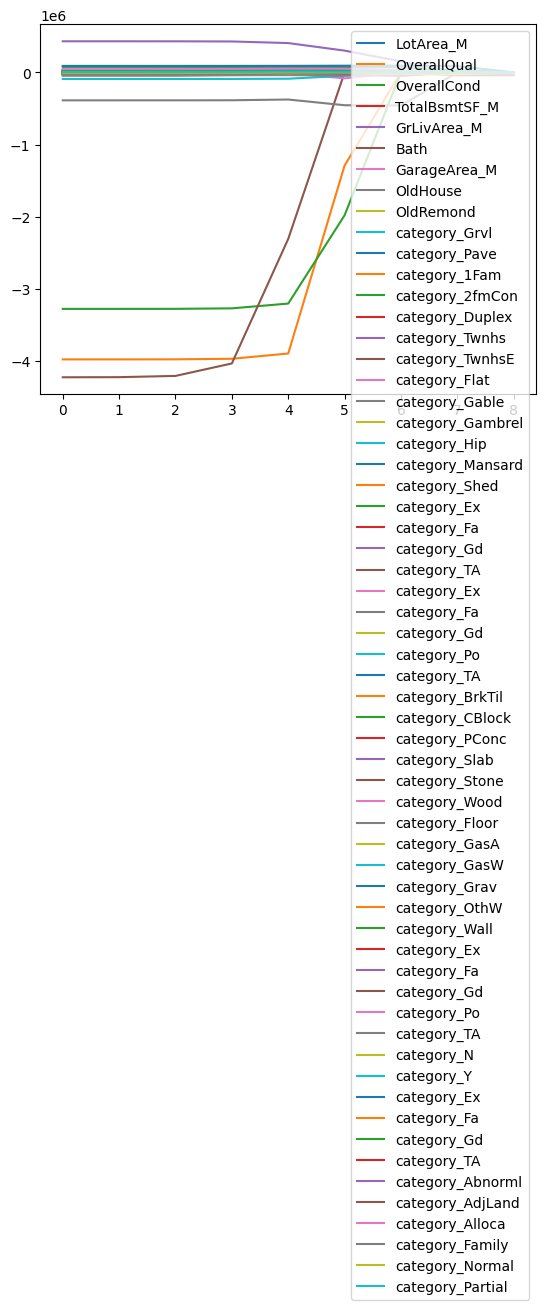

In [113]:
coef_lasso.plot()

Посмотрите на веса полученной модели. Какой вывод можно сделать?

По результатам, можно сделать вывод, что с увеличением значения параметра регуляризации lambda веса модели начинают уменьшаться. Это происходит потому, что регуляризация штрафует модель за сложность и предотвращает переобучение.

При lambda = 0.0001 веса имеют наибольшие значения, что может свидетельствовать о том, что модель склонна к переобучению. С увеличением lambda веса уменьшаются, при lambda = 10000 веса даже обнуляются. 

В данном случае, для выбора оптимального значения lambda необходимо смотреть на переобучение и недообучение модели, а также на качество прогнозов на тестовой выборке.

для определения оптимального значения lambda требуется баланс между уменьшением переобучения и способностью модели хорошо обобщать данные. В данном случае, значения lambda равное 0.001 кажется наиболее оптимальным, так как оно обеспечивает хороший баланс между снижением переобучения и сохранением производительности модели.

3. Понаблюдайте, как ведёт себя модель с L2-регуляризацией (Ridge). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Ridge.

In [114]:
ridge_reg = Ridge(alpha=0.1, random_state=42) # alpha — величина регуляризации
# обучение
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.1, random_state=42)

In [115]:
# вывод точности предсказания
print(ridge_reg.score(x_train, y_train))
print(ridge_reg.score(x_test, y_test))
# коэффициенты модели
print('w_0:', ridge_reg.intercept_)
print('w_i:', ridge_reg.coef_)

0.6582044143961825
0.67461728373301
w_0: 127998.48276104892
w_i: [ 5.62743351e+04 -1.53811898e+05 -1.94511958e+05 -5.80354723e+04
  2.70762055e+05 -4.12694099e+04 -1.21041568e+05 -4.91486388e+05
 -3.35314549e+04  1.42349528e+04 -1.42349528e+04  2.91399943e+04
  2.26730136e+04  1.02373502e+04 -4.12603614e+04 -2.07899967e+04
  1.20382372e+04 -1.95197724e+04 -1.18262116e+04 -2.78155566e+02
 -3.74823771e+03  2.33341400e+04  5.34548097e+04 -3.26045432e+04
  4.73878640e+03 -2.55890529e+04 -5.25988395e+03  6.89219864e+03
  1.66096324e+04 -3.42489474e+04  1.60070004e+04  1.14218105e+04
  3.40687864e+03  6.12315754e+03 -3.95751939e+04  1.03950643e+04
  8.22828299e+03 -4.18004491e+04  1.76740814e+03  2.87016783e+04
 -1.62987556e+04  1.76294756e+03  2.58671706e+04 -1.24441659e+03
  5.30129372e+03 -8.51213757e+03  6.28628921e+03 -1.83102877e+03
 -1.05373905e+04  1.05373905e+04  6.79226761e+04 -3.31450721e+04
 -5.57332476e+03 -2.92042793e+04 -1.18377914e+04 -2.86679448e+04
  4.88908853e+04 -1.07793

Посмотрите на веса полученной модели. Какой вывод можно сделать?

In [116]:
coef = []
for i in range(-4, 5):
  alpha = 10**i
  ridge_reg = Ridge(alpha=alpha) # alpha — величина регуляризации

  # обучение
  ridge_reg.fit(x_train, y_train)

  coef.append(list(ridge_reg.coef_))

  # вывод точности предсказания
  print('-'*5, 'lambda =', alpha, '-'*5)
  print(ridge_reg.score(x_train, y_train))
  print(ridge_reg.score(x_test, y_test))

----- lambda = 0.0001 -----
0.6797048840959048
0.6922886155779749
----- lambda = 0.001 -----
0.6784862713189121
0.6919257660185893
----- lambda = 0.01 -----
0.6682797901453322
0.6843190048668024
----- lambda = 0.1 -----
0.6582044143961825
0.67461728373301
----- lambda = 1 -----
0.6401394061432795
0.6598248438560008
----- lambda = 10 -----
0.6028931229469106
0.6319945790186043
----- lambda = 100 -----
0.5377554335041248
0.5518687275812864
----- lambda = 1000 -----
0.34075831805178547
0.33020086725305475
----- lambda = 10000 -----
0.07896064737888964
0.07424902159983027


Из результатов можно увидеть, что с увеличением значения гиперпараметра $\lambda$ (alpha в коде) качество модели по метрике R^2 уменьшается как на обучающей, так и на тестовой выборке. Наименьшее качество модели достигается при lambda = 10000, что говорит о сильной регуляризации модели и необходимости тщательного подбора значения параметра $\lambda$.

Также видно, что при lambda = 0.1 получается наилучшее значение метрики R^2 на тестовой выборке, что указывает на оптимальное значение гиперпараметра для данной модели.

Веса признаков также изменяются с увеличением $\lambda$. Большие значения $\lambda$ приводят к уменьшению весов, что позволяет уменьшить влияние ненужных признаков и бороться с переобучением.

Изменения весов признаков также могут помочь в интерпретации модели и понимании, какие признаки оказывают наибольшее или наименьшее влияние на целевую переменную.

In [117]:
coef = pd.DataFrame(coef, columns=x_train.columns)
coef

,LotArea_M,OverallQual,OverallCond,TotalBsmtSF_M,GrLivArea_M,Bath,GarageArea_M,OldHouse,OldRemond,category_Grvl,...,category_Ex,category_Fa,category_Gd,category_TA,category_Abnorml,category_AdjLand,category_Alloca,category_Family,category_Normal,category_Partial
0,-24049.079310,-3.924254e+06,-3.265253e+06,6877.708877,422152.893356,-3.580192e+06,-7313.932941,-384371.352917,20119.901714,16584.661552,...,64239.005151,-31976.423264,-3159.900066,-29102.681636,-17056.571969,-15955.334207,47174.677197,-16491.747171,-4980.805487,7309.781580
1,14348.995229,-3.209527e+06,-2.945758e+06,6091.383642,388452.558182,-1.705162e+06,-39580.081702,-397796.379146,11955.608140,16366.758948,...,65117.622625,-32310.254245,-3646.451466,-29160.916891,-16045.200132,-18961.784791,47956.782268,-15437.430041,-4560.322181,7047.954871
2,86404.830618,-1.102376e+06,-1.205302e+06,-30747.337188,337459.707781,-3.735382e+05,-125137.903267,-501432.043500,7431.021505,15330.462518,...,66945.246041,-32739.205345,-4944.551604,-29261.489091,-13129.953987,-26103.188700,48496.737693,-12273.158151,-3518.293203,6527.856346
3,56274.335075,-1.538119e+05,-1.945120e+05,-58035.472278,270762.054544,-4.126941e+04,-121041.568463,-491486.388017,-33531.454912,14234.952763,...,67922.676134,-33145.072118,-5573.324759,-29204.279257,-11837.791377,-28667.944796,48890.885255,-10779.357045,-3448.522966,5842.730930
4,7015.543264,-1.836672e+04,-3.060447e+04,-43735.346417,132834.948223,-1.894778e+03,-22319.436173,-237129.396700,-73176.313956,12688.324784,...,69208.729771,-36203.313450,-3910.007644,-29095.408677,-12578.528307,-24048.353189,45855.821785,-10799.368437,-4560.731326,6131.159474
5,3264.537959,-2.369581e+03,-4.369645e+03,-10600.273375,19969.539818,-7.783331e+01,-1335.132426,-44551.375796,-20907.695488,5812.455693,...,64117.323661,-33498.159290,-2065.987497,-28553.176874,-11636.595078,-8380.545748,20520.585687,-6794.550417,-4218.934747,10510.040303
6,1830.240029,-3.909241e+02,-6.630750e+02,-1880.168192,-376.835903,-6.011793e+01,-412.072363,-7262.956045,-4191.985731,886.841364,...,33482.593180,-11094.966528,-273.453191,-22114.173462,-6503.917821,-1418.737821,3048.118663,-1695.394642,-5179.168659,11749.100279
7,334.500654,-4.569239e+01,-9.972206e+01,-45.668103,-187.009740,-8.583451e+00,37.128767,-1427.480138,-901.311301,19.501931,...,7314.702974,-1753.070193,4229.363670,-9790.996451,-1386.143276,-229.304309,255.769127,-330.618640,-2732.955464,4423.252561
8,33.586193,-3.405051e+00,-1.172864e+01,23.894653,-0.227200,-3.964714e-01,20.096623,-204.953825,-134.449281,-6.156407,...,930.304265,-214.552002,1097.179504,-1812.931767,-189.019952,-29.397133,18.538111,-47.485339,-449.725778,697.090090


<Axes: >

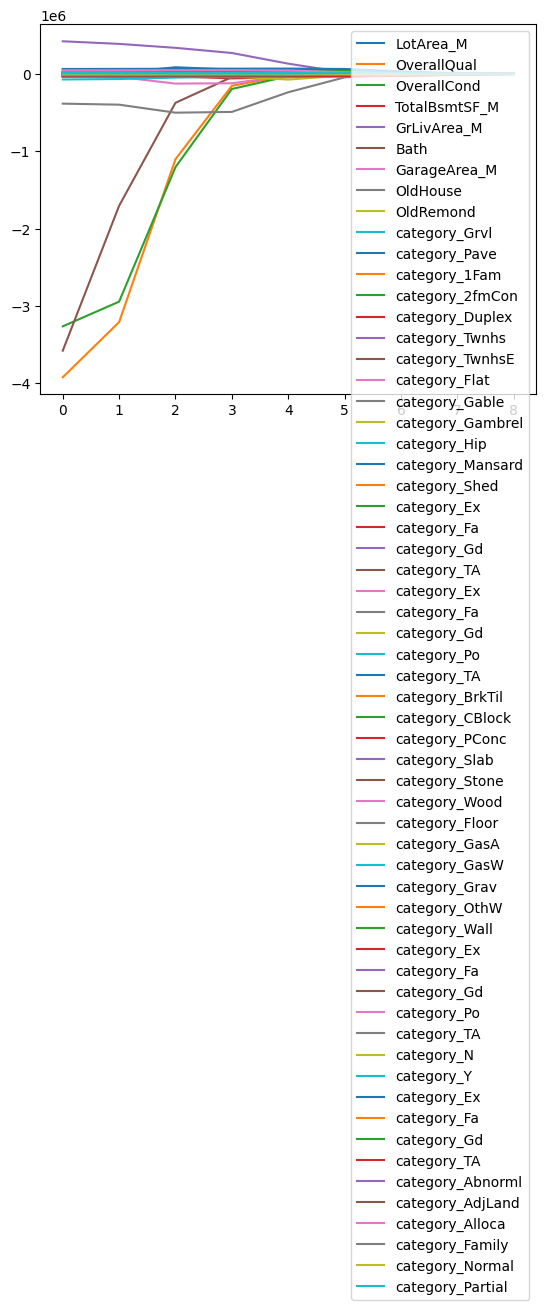

In [118]:
coef.plot()

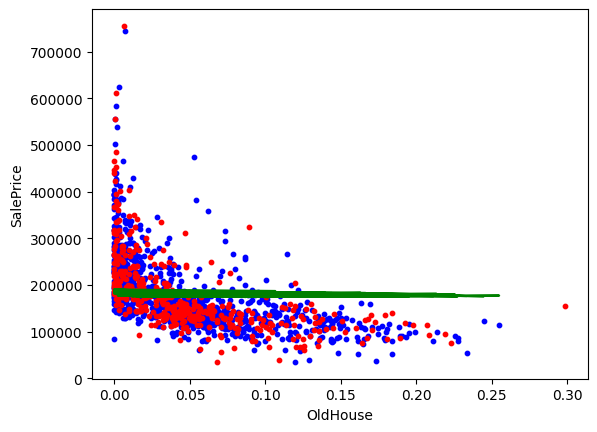

In [119]:
y_predict_train = ridge_reg.predict(x_train)

plt.scatter(x_train['OldHouse'], y_train, s=10, c='b')
plt.scatter(x_test['OldHouse'], y_test, s=10, c='r')
plt.plot(x_train['OldHouse'], y_predict_train, c='g')
plt.xlabel('OldHouse')
plt.ylabel('SalePrice')
plt.show()

In [120]:
# Получение трех признаков с наибольшими положительными коэффициентами
top_positive_features = coef.max().nlargest(3)

# Получение трех признаков с наибольшими отрицательными коэффициентами
top_negative_features = coef.min().nsmallest(3)

print("Top 3 features with highest positive coefficients:")
print(top_positive_features)

print("\nTop 3 features with lowest negative coefficients:")
print(top_negative_features)


Top 3 features with highest positive coefficients:
GrLivArea_M    422152.893356
LotArea_M       86404.830618
category_Ex     69208.729771
dtype: float64

Top 3 features with lowest negative coefficients:
OverallQual   -3.924254e+06
Bath          -3.580192e+06
OverallCond   -3.265253e+06
dtype: float64


In [124]:
non_zero_coef = coef_lasso.loc[:, coef_lasso.any() != 0]
top_three_features = non_zero_coef.abs().sum(axis=0).sort_values().tail(3)
print(top_three_features)

OverallCond    1.828790e+07
Bath           1.899813e+07
OverallQual    2.108892e+07
dtype: float64


## Задание 6

Ответьте на следующие вопросы:

1. В последней обученной модели выберите три признака с наибольшими положительными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем больше сумма сделки?

2. В последней обученной модели выберите три признака с наибольшими отрицательными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем меньше сумма сделки?

3. В модели Lasso выберите три признака с нулевыми коэффициентами. Как вы думаете, почему модель их исключила? Можно ли смело утверждать, что сумма сделки от этих признаков не зависит?

## Заключение

В этом модуле с помощью регуляризации вы научились обучать модели линейной регрессии с регуляризацией, подбирать коэффициент регуляризации alpha, а также отбирать признаки с помощью L1-регуляризации. 